In [1]:
pip install pybaseball

     |████████████████████████████████| 415 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 24.6 MB 559 kB/s eta 0:00:01     |████████████████████████████▌   | 21.9 MB 1.3 MB/s eta 0:00:03
     |████████████████████████████████| 297 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 349 kB 1.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import pandas as pd
import numpy as np
from pybaseball import batting_stats

In [2]:
START = 2002
END = 2022

In [3]:
batting = batting_stats(START, END, qual = 200)

In [4]:
batting.to_csv("batting.csv")

In [5]:
batting = batting.groupby("IDfg", group_keys = False).filter(lambda x: x.shape[0] > 1)

In [6]:
batting

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA
0,1109,2002,Barry Bonds,SFG,37,143,403,612,149,70,...,NaN,NaN,NaN,NaN,0,0.127,0.191,NaN,NaN,NaN
1,1109,2004,Barry Bonds,SFG,39,147,373,617,135,60,...,NaN,NaN,NaN,NaN,0,0.124,0.164,NaN,NaN,NaN
8,15640,2022,Aaron Judge,NYY,30,157,570,696,177,87,...,0.262,118.4,246.0,0.609,404,0.169,0.287,NaN,NaN,NaN
15,13611,2018,Mookie Betts,BOS,25,136,520,614,180,96,...,0.131,110.6,217.0,0.500,434,0.220,0.270,NaN,NaN,NaN
2,1109,2003,Barry Bonds,SFG,38,130,390,550,133,65,...,NaN,NaN,NaN,NaN,0,0.135,0.223,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6885,1698,2010,Gerald Laird,DET,30,89,270,299,56,40,...,NaN,NaN,0.0,NaN,0,0.166,0.252,NaN,NaN,NaN
7042,9272,2018,Chris Davis,BAL,32,128,470,522,79,51,...,0.096,111.8,113.0,0.401,282,0.174,0.316,NaN,NaN,NaN
6673,319,2011,Adam Dunn,CHW,31,122,415,496,66,39,...,NaN,NaN,0.0,NaN,0,0.169,0.295,NaN,NaN,NaN
6988,620,2002,Neifi Perez,KCR,29,145,554,585,131,104,...,NaN,NaN,NaN,NaN,0,0.130,0.187,NaN,NaN,NaN


In [8]:
def next_season(player):
    player = player.sort_values("Season")
    player["Next_WAR"] = player["WAR"].shift(-1)
    return player

batting = batting.groupby("IDfg", group_keys = False).apply(next_season)

In [9]:
batting[["Name", "Season", "WAR", "Next_WAR"]]

,Name,Season,WAR,Next_WAR
5562,Alfredo Amezaga,2006,1.1,2.0
5006,Alfredo Amezaga,2007,2.0,1.2
5252,Alfredo Amezaga,2008,1.2,NaN
1169,Garret Anderson,2002,3.7,5.1
864,Garret Anderson,2003,5.1,0.8
...,...,...,...,...
6002,Owen Miller,2022,0.6,NaN
4881,Andrew Vaughn,2021,-0.3,-0.4
3377,Andrew Vaughn,2022,-0.4,NaN
6620,Ha-seong Kim,2021,0.5,3.7


In [10]:
null_count = batting.isnull().sum()

In [11]:
null_count

IDfg           0
Season         0
Name           0
Team           0
Age            0
            ... 
CSW%           0
xBA         6754
xSLG        6754
xwOBA       6754
Next_WAR    1179
Length: 320, dtype: int64

In [14]:
complete_cols = list(batting.columns[null_count == 0])

In [16]:
batting = batting[complete_cols + ["Next_WAR"]].copy()

In [17]:
batting

,IDfg,Season,Name,Team,Age,G,AB,PA,H,1B,...,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,Events,CStr%,CSW%,Next_WAR
5562,1,2006,Alfredo Amezaga,FLA,28,132,334,378,87,72,...,86,107,113,143,109,63,0,0.188,0.256,2.0
5006,1,2007,Alfredo Amezaga,FLA,29,133,400,448,105,80,...,92,101,112,109,113,75,0,0.175,0.227,1.2
5252,1,2008,Alfredo Amezaga,FLA,30,125,311,337,82,61,...,99,101,101,123,111,64,0,0.178,0.244,NaN
1169,2,2002,Garret Anderson,ANA,30,158,638,678,195,107,...,118,91,80,65,97,129,0,0.137,0.232,5.1
864,2,2003,Garret Anderson,ANA,31,159,638,673,201,119,...,112,101,80,90,99,109,0,0.164,0.252,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,24655,2022,Owen Miller,CLE,25,130,424,472,103,70,...,92,111,97,131,100,83,340,0.188,0.266,NaN
4881,26197,2021,Andrew Vaughn,CHW,23,127,417,469,98,61,...,87,104,116,84,99,110,321,0.185,0.285,-0.4
3377,26197,2022,Andrew Vaughn,CHW,24,134,510,555,138,92,...,88,106,111,94,100,104,419,0.201,0.291,NaN
6620,27506,2021,Ha-seong Kim,SDP,25,117,267,298,54,32,...,126,99,59,137,96,88,201,0.216,0.303,3.7


In [18]:
batting.dtypes

IDfg          int64
Season        int64
Name         object
Team         object
Age           int64
             ...   
Hard%+        int64
Events        int64
CStr%       float64
CSW%        float64
Next_WAR    float64
Length: 132, dtype: object

In [19]:
batting.dtypes[batting.dtypes == "object"]

Name       object
Team       object
Dol        object
Age Rng    object
dtype: object

In [20]:
batting["Dol"]

5562      $5.5
5006     $11.2
5252      $7.2
1169     $14.6
864      $22.0
         ...  
6002      $4.8
4881    ($2.6)
3377    ($3.5)
6620      $4.0
4396     $29.3
Name: Dol, Length: 6754, dtype: object

In [21]:
del batting["Dol"]

In [22]:
del batting["Age Rng"]

In [23]:
batting["team_code"] = batting["Team"].astype("category").cat.codes

In [24]:
batting_full = batting.copy()
batting = batting.dropna().copy()

In [25]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import TimeSeriesSplit

rr = Ridge(alpha=1)

split = TimeSeriesSplit(n_splits=3)

sfs = SequentialFeatureSelector(rr, 
                                n_features_to_select=20, 
                                direction="forward",
                                cv=split,
                                n_jobs=8
                               )

In [26]:
removed_columns = ["Next_WAR", "Name", "Team", "IDfg", "Season"]
selected_columns = batting.columns[~batting.columns.isin(removed_columns)]

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
batting.loc[:,selected_columns] = scaler.fit_transform(batting[selected_columns])

In [28]:
sfs.fit(batting[selected_columns], batting["Next_WAR"])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=Ridge(alpha=1), n_features_to_select=20,
                          n_jobs=8)

In [29]:
predictors = list(selected_columns[sfs.get_support()])

In [30]:
predictors

['Age',
 'IBB',
 'SO',
 'SB',
 'BU',
 'BABIP',
 'WAR',
 'Spd',
 'PH',
 'CB%',
 'CH%',
 'wCH',
 'O-Contact%',
 'wGDP',
 'Oppo%',
 'OBP+',
 'SLG+',
 'Pull%+',
 'Soft%+',
 'Hard%+']

In [31]:
def backtest(data, model, predictors, start=5, step=1):
    all_predictions = []
    
    years = sorted(data["Season"].unique())
    
    for i in range(start, len(years), step):
        current_year = years[i]
        train = data[data["Season"] < current_year]
        test = data[data["Season"] == current_year]
        
        model.fit(train[predictors], train["Next_WAR"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["Next_WAR"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [33]:
predictions = backtest(batting, rr, predictors)

In [34]:
predictions.shape

(4127, 2)

In [36]:
from sklearn.metrics import mean_squared_error
mean_squared_error(predictions["actual"], predictions["prediction"])

2.8011794216119004

In [37]:
def player_history(df):
    df = df.sort_values("Season")
        
    df["player_season"] = range(0, df.shape[0])
    df["war_corr"] = list(df[["player_season", "WAR"]].expanding().corr().loc[(slice(None), "player_season"),"WAR"])
    df["war_corr"].fillna(0, inplace=True)
    
    df["war_diff"] = df["WAR"] / df["WAR"].shift(1)
    df["war_diff"].fillna(1, inplace=True)
    df["war_diff"][df["war_diff"] == np.inf] = 1
    
    return df

batting = batting.groupby("IDfg", group_keys=False).apply(player_history)

In [38]:
def group_averages(df):
    return df["WAR"] / df["WAR"].mean()

In [39]:
batting["war_season"] = batting.groupby("Season", group_keys=False).apply(group_averages)

In [40]:
new_predictors = predictors + ["player_season", "war_corr", "war_season", "war_diff"]

In [41]:
predictions = backtest(batting, rr, new_predictors)

In [42]:
mean_squared_error(predictions["actual"], predictions["prediction"])

2.7141271122632324

In [43]:
pd.Series(rr.coef_, index = new_predictors).sort_values()

Age             -2.613361
WAR             -1.873384
BABIP           -1.784208
SLG+            -1.347609
Soft%+          -1.200109
BU              -0.975275
PH              -0.702824
SO              -0.668198
war_diff        -0.588878
wGDP            -0.363427
CB%             -0.320678
wCH             -0.282596
CH%             -0.245154
Pull%+          -0.161653
war_corr        -0.092850
player_season    0.000959
O-Contact%       0.249812
OBP+             0.531483
Oppo%            0.676553
Spd              0.792787
SB               1.089041
IBB              1.681935
Hard%+           2.349468
war_season       3.478724
dtype: float64

In [44]:
diff = predictions["actual"] - predictions["prediction"]

In [45]:
merged = predictions.merge(batting, left_index=True, right_index=True)

In [46]:
merged["diff"] = (predictions["actual"] - predictions["prediction"]).abs()

In [47]:
merged[["IDfg", "Season", "Name", "WAR", "Next_WAR", "diff"]].sort_values(["diff"])

,IDfg,Season,Name,WAR,Next_WAR,diff
4115,5352,2014,Yangervis Solarte,0.316770,1.8,0.000725
567,3442,2010,Dan Uggla,0.496894,2.3,0.000737
3902,1388,2007,Greg Norton,0.192547,0.4,0.002451
4389,6589,2013,Sean Rodriguez,0.267081,0.2,0.002630
4179,12510,2019,Curt Casali,0.273292,0.5,0.003488
...,...,...,...,...,...,...
3161,4810,2007,Brian McCann,0.304348,8.6,6.373020
3823,1875,2009,Josh Hamilton,0.291925,8.4,6.392358
871,9166,2010,Buster Posey,0.459627,10.1,6.580159
2517,11579,2014,Bryce Harper,0.310559,9.3,7.518072


In [48]:
merged.to_csv("baseball.csv")

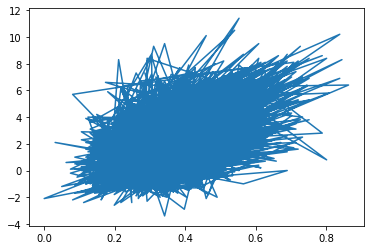

In [50]:
import matplotlib.pyplot as plt
plt.plot(merged['WAR'], merged['Next_WAR'])
plt.show()

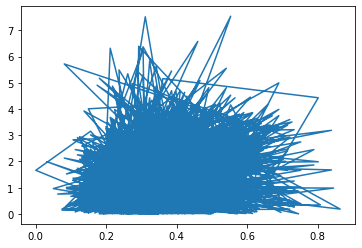

In [51]:
plt.plot(merged['WAR'], merged['diff'])
plt.show()